Analysis 2:   
Does higher energy consumption affect life expectancy (broken down by continents)?

In [308]:
# Import Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import textwrap

In [309]:
# Make a reference to the csv file path
csv_path = Path("energyLEclean_NA.csv")

# Import the csv file as a DataFrame
data_df = pd.read_csv(csv_path)

# Check the df
data_df.head()

,Unnamed: 0,Location,Year,population,fossil_energy_per_capita,renewables_energy_per_capita,energy_per_capita,Record Counter,LEx,LE15,LE65,LE80
0,87,Africa,1965,321447378.0,2100.505,127.918,2228.423,27,43.4401,45.7137,11.2665,4.9844
1,88,Africa,1966,329658389.0,2136.364,139.123,2275.487,27,43.4330,45.6340,11.2447,4.9787
2,89,Africa,1967,338159967.0,2099.772,141.577,2241.349,27,43.6456,45.5410,11.2492,4.9786
3,90,Africa,1968,346980412.0,2145.930,161.394,2307.324,27,44.1023,45.8270,11.3158,4.9931
4,91,Africa,1969,356070643.0,2126.871,183.537,2310.408,27,44.3156,45.8841,11.3276,4.9919


In [310]:
# Reduce df to only columns needed for this analysis
reduced_df = data_df[["Year", "Location", "energy_per_capita", "LEx","LE15", "LE65", "LE80"]]
reduced_df.head(10)

,Year,Location,energy_per_capita,LEx,LE15,LE65,LE80
0,1965,Africa,2228.423,43.4401,45.7137,11.2665,4.9844
1,1966,Africa,2275.487,43.4330,45.6340,11.2447,4.9787
2,1967,Africa,2241.349,43.6456,45.5410,11.2492,4.9786
3,1968,Africa,2307.324,44.1023,45.8270,11.3158,4.9931
4,1969,Africa,2310.408,44.3156,45.8841,11.3276,4.9919
5,1970,Africa,2443.656,44.7834,46.2162,11.3747,5.0075
6,1971,Africa,2541.196,45.3220,46.5480,11.4290,5.0282
7,1972,Africa,2618.036,45.4068,46.4846,11.4552,5.0464
8,1973,Africa,2761.800,46.1543,46.9747,11.5514,5.0864
9,1974,Africa,2822.004,46.4601,47.1863,11.5797,5.1098


In [311]:
# average energy per capita and Life expectancy at birth for all years. 
mean_df = reduced_df[["energy_per_capita", "LEx"]].mean()
mean_df

energy_per_capita    32680.950614
LEx                     71.241299
dtype: float64

In [312]:
# Looking at 2021 by continent, country, income groupings
#reduced_df.loc[reduced_df["Location"].isin(['Africa', 'Antarctica', 'Asia','Europe','North America','Oceana','South America'])]

new_df = reduced_df.loc[reduced_df["Location"].isin(['Africa', 'Antarctica', 'Asia','Europe','North America','Oceania','South America'])]
#new_df.head()
one_year_df = new_df[(new_df['Year'] == 2021)]
one_year_df.head(10)

,Year,Location,energy_per_capita,LEx,LE15,LE65,LE80
56,2021,Africa,4027.117,61.6609,52.1976,12.5590,5.5959
230,2021,Asia,18812.572,72.5321,59.8141,15.9106,7.4329
1198,2021,Europe,40415.152,77.0336,62.4324,17.7173,8.3612
2411,2021,North America,54584.871,77.7299,63.2922,19.2612,9.5845
2541,2021,Oceania,41087.691,79.4444,66.2845,20.4808,9.7762
3085,2021,South America,16192.434,72.9158,59.1581,16.0654,7.1328


In [313]:
# Columns for 2021 by continent
# setting up columns for 2021 df energy by continent
continents = one_year_df["Location"]
LEx1 = one_year_df["LEx"]

energy_per_capita1 = one_year_df['energy_per_capita']




C:\Users\kyleb\AppData\Local\Temp\ipykernel_24052\881287241.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x = continents[0:6]
C:\Users\kyleb\AppData\Local\Temp\ipykernel_24052\881287241.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y1 = energy_per_capita1[0:6]
C:\Users\kyleb\AppData\Local\Temp\ipykernel_24052\881287241.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based

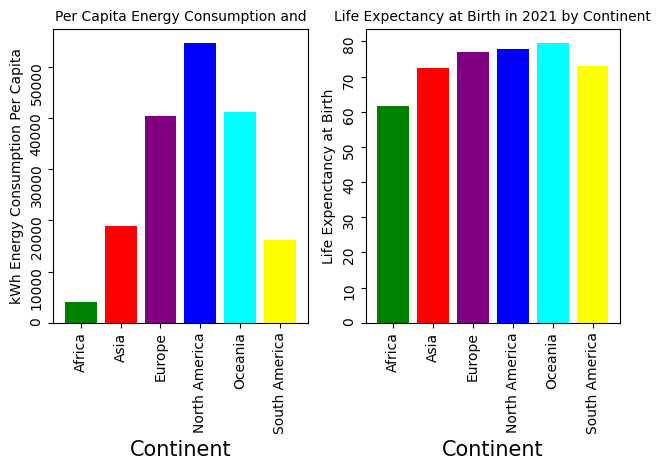

In [314]:
#Plot bar graph for Energy and LEx for 2021

x = continents[0:6]
y1 = energy_per_capita1[0:6]
y2 = LEx1[0:6]
fig, (ax1, ax2) = plt.subplots(1,2, sharex = True) 

ax1.bar(x,y1, color=['green', 'red', 'purple', 'blue', 'cyan', 'yellow'])
ax2.bar(x,y2,  color=['green', 'red', 'purple', 'blue', 'cyan', 'yellow'])

#first graph formatting
ax1.set_title("Per Capita Energy Consumption and", fontsize = 10)
ax1.set_ylabel("kWh Energy Consumption Per Capita")
ax1.set_xlabel("Continent", fontsize = 15)
ax1.tick_params(labelrotation=90)


#second graph formatting
ax2.set_title("Life Expectancy at Birth in 2021 by Continent", fontsize = 10)
ax2.set_ylabel("Life Expenctancy at Birth")
ax2.set_xlabel("Continent", fontsize = 15)
ax2.tick_params(labelrotation=90)

plt.tight_layout()



In [315]:
# Looking at 1965 by continent, country, income groupings
#reduced_df.loc[reduced_df["Location"].isin(['Africa', 'Antarctica', 'Asia','Europe','North America','Oceana','South America'])]

new_df = reduced_df.loc[reduced_df["Location"].isin(['Africa', 'Antarctica', 'Asia','Europe','North America','Oceania','South America'])]
#new_df.head()
two_year_df = new_df[(new_df['Year'] == 1965)]
two_year_df.head(10)

,Year,Location,energy_per_capita,LEx,LE15,LE65,LE80
0,1965,Africa,2228.423,43.4401,45.7137,11.2665,4.9844
174,1965,Asia,2816.082,50.5795,48.2289,11.1161,4.8483
1142,1965,Europe,30301.293,69.7955,57.9409,14.3409,6.1746
2355,1965,North America,56296.660,70.3669,57.6278,14.7463,6.7945
2485,1965,Oceania,29017.244,65.8003,55.8474,13.9786,6.3733
3029,1965,South America,6260.950,56.9341,52.4490,12.9996,5.4895


In [316]:
# Columns for 1965 by continent
# setting up columns for 1965 df energy by continent
continents = two_year_df["Location"]
LEx = two_year_df["LEx"]

energy_per_capita = two_year_df['energy_per_capita']

C:\Users\kyleb\AppData\Local\Temp\ipykernel_24052\1307059897.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x = continents[0:6]
C:\Users\kyleb\AppData\Local\Temp\ipykernel_24052\1307059897.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y1 = energy_per_capita[0:6]
C:\Users\kyleb\AppData\Local\Temp\ipykernel_24052\1307059897.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-bas

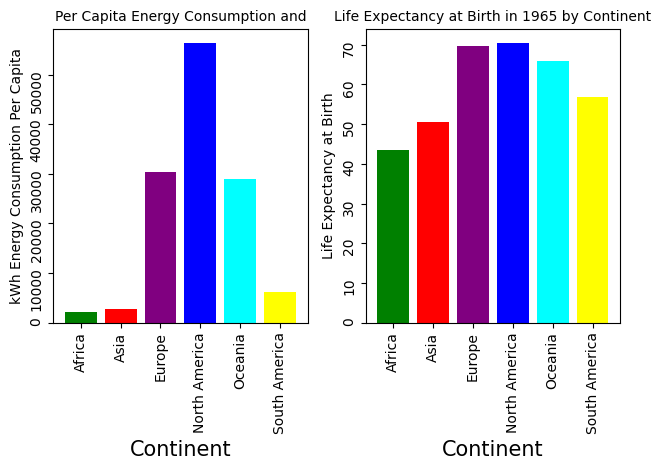

In [317]:
x = continents[0:6]
y1 = energy_per_capita[0:6]
y2 = LEx[0:6]
fig, (ax1 ,ax2) = plt.subplots(1,2, sharex = True)
                                
ax1.bar(x,y1, color=['green', 'red', 'purple', 'blue', 'cyan', 'yellow'])
ax2.bar(x,y2,  color=['green', 'red', 'purple', 'blue', 'cyan', 'yellow'])

ax1.set_title("Per Capita Energy Consumption and", fontsize = 10)
ax1.set_ylabel("kWh Energy Consumption Per Capita")
ax1.set_xlabel("Continent", fontsize =15)
ax1.tick_params(labelrotation=90)

ax2.set_title("Life Expectancy at Birth in 1965 by Continent", fontsize = 10)
ax2.set_ylabel("Life Expectancy at Birth")
ax2.set_xlabel("Continent", fontsize =15)
ax2.tick_params(labelrotation=90)
plt.tight_layout()
